In [1]:
"""
Copyright 2021 Huawei Technologies Co., Ltd

CREATED:  2020-6-04 20:12:13
MODIFIED: 2021-11-01 01:48:45
"""

# -*- coding:utf-8 -*-
import cv2
import time

from PIL import Image, ImageDraw
from acl_model import Model

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
with open("data/coco.names") as fd:
    coco_labels = fd.readlines()

coco_labels = [i[:-1] for i in coco_labels][0:]

In [4]:
device_id = 0
model_path = "model/yolov5l_v6.om"

In [5]:
model = Model(device_id, model_path, model_type="yolov5")

[ACL] init resource stage:
[ACL] init resource stage success
[Model] class Model init resource stage:
[Model] create model output dataset:
[Model] create model output dataset success
model input size 1
input  0
model input dims ({'name': 'images', 'dimCount': 4, 'dims': [1, 640, 640, 3]}, 0)
model input datatype 4
model output size 1
output  0
model output dims ({'name': 'Concat_452:0:output', 'dimCount': 3, 'dims': [1, 25200, 85]}, 0)
model output datatype 0
[Model] class Model init resource stage success


In [149]:
img_path = "data/person.jpg"
img_org_bgr = cv2.imread(img_path)

In [150]:
%timeit -n 10 -r 3
bboxes,_ = model.run1(img_org_bgr)

[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
inference takes 0.013861417770385742
moving data takes 0.002706766128540039
detect takes 0.025777101516723633
nms takes 0.0008983612060546875
the rest takes 0.00025773048400878906


In [151]:
img = Image.open(img_path)

In [152]:
img1 = ImageDraw.Draw(img)

import random as rnd


for bbox in bboxes:
    color ="#FF"+''.join([rnd.choice('0123456789ABCDEF') for j in range(4)])
    img1.rectangle(list(bbox[:4]), outline =color, width=3)
    print(bbox[:4], bbox[4], bbox[5], coco_labels[int(bbox[5])])
for bbox in bboxes:
    img1.rectangle((bbox[0],bbox[1],bbox[0]+45,bbox[1]+15),outline = (255,255,255),width=10)
    img1.text((bbox[0]+5, bbox[1]),coco_labels[int(bbox[5])],(0,0,0),thickness=10)

[190.0, 98.0, 274.0, 381.0] 0.9398992 0 person
[404.0, 141.0, 600.0, 347.0] 0.9183604 17 horse
[63.0, 265.0, 202.0, 349.0] 0.8940821 16 dog


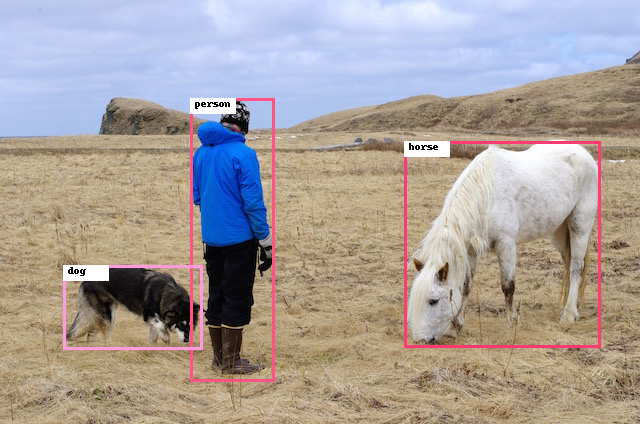

In [153]:
img